<a href="https://colab.research.google.com/github/lawrenceN/ASPBaseApp/blob/master/Copy_of_CS__Part_1_Simple_Image_Classifier_Using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

Create a CNN (Convolutional Neural Network) model. Use the model to classify handwritten digits.

# Workflow

1. Load in the MNIST dataset and examine the structure.


*   Use any library to load the MNIST dataset (Include both Tensorflow and PyTorch modules) 
*   Take a closer look at the data inspecting it's size, shape and quantity.
* View some random sample using either OpenCV or Matplotlib (or others) of the handwritten digits and observe the complexity of the images. (Do you have any issue identifying these written numbers?)
2. Using Numpy or other libraries preparing the dataset for training 
* Ensure the format or shape of the data is appropriate for input into the model. (One -hot- encoding)-- apple 1   price 5 mango 2 10
* Ensure the data types are correct and the data is normalized.
3. Create a CNN with the following specifications
*  input Dimensions 28 * 28 * 1
*  Two Convolution Layers (kernel size 3* 3) first with 64 filters, the second 32. use ReLU  (Rectified Linear Unit - ReLU- the activation layer)
* Max pooling size 2*2
* Dropout rate 0.25
* Add a Dense Layer comprising of 128 outputs
* Add another dropout layer using rate setting of 0.5
* Add the final dropout layer that indicated the class probabilities 
4. Train the CNN on the MNIST dataset that was prepared in step 2 
 * Train for atleast 10 Epochs using a batch size of 32
 5. Plot graphs showing how your training and validataion loss and accuracy changed with respect to the Epochs completed.
 6. Save the model, will be used in the second PART 
 7. Test the model on some random samples from the test dataset.


# Deliverable 

Jupyter Notebook documents the workflow as we take the MNIST dataset, view samples, convert it into the right shape/format as required for the deep learning library. The model built will be the one used for the next step.

# Loading the Handwritten Digit Dataset (MNIST)

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
#Loads the MNIST dataset
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#Display the number of samples in the x_train, x_test, y_train, y_test
print("Initial shape or dimensions of the x_train",str(x_train.shape)+ '\n')
print('Number of samples in our training data: '+ str(len(x_train)) )
print('Number of labels in our training data: '+ str(len(x_train)))
print('Number of samples in our test data: '+ str(len(x_test)))
print('Number of labels in our test data: '+ str(len(y_test))+ '\n')

print('Dimensions of the x_train: '+str(x_train[0].shape))
print('Labels in x_train: '+str(y_train.shape)+ '\n')

print('Dimensions of the x_text: '+ str(x_test[0].shape))
print('Labels in y_test: '+ str(y_test.shape)) 

Initial shape or dimensions of the x_train (60000, 28, 28)

Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of the x_train: (28, 28)
Labels in x_train: (60000,)

Dimensions of the x_text: (28, 28)
Labels in y_test: (10000,)


# Let's take a look the images in the Dataset

In [4]:
#importing matplotlib
import matplotlib.pyplot as plt
import numpy as np


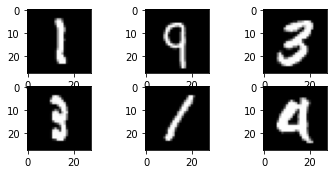

In [5]:
#Plot 6 images, using subplot
#set the colormap to grey since our image dataset is grayscale.
plt.subplot(331)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))


plt.subplot(336)
random_num=np.random.randint(0,len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))
plt.show()

# Preparing the Dataset for Keras

Keras requires our input data as a 4-d shape of (60000, 28,28,1). When we initially loaded our data, x_train was (60,000,28,28). We need our labels to be one-hot-encoded (https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/). 

In [6]:
#lets store the number of rows and columns
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

#get the data in the right shape for Keras.
#add a 4th dimension to our data (60 000, 28,28) to (60 000,28,28,1)
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)


#store the shape of a single image for future use as a variable storing our input shape
input_shape=(img_rows,img_cols,1)

#change the image type to be a float
x_train=x_train.astype('float32') # unint8
x_test=x_test.astype('float32')

#normalize the data by changing the range from 0-255 to 0-1 

x_train /=255.0
x_test /=255.0

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0],'test samples')



x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Performe the one-hot-enconding of the data labels

In [7]:
from tensorflow.keras.utils import to_categorical
#one hot encode for outputs
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

#count the number of columns in our hot encoded matrix
print('Number of Classes: '+str(y_test.shape[1]))
num_classes=y_test.shape[1]

Number of Classes: 10


# Creating the CNN Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

#create a model
model=Sequential()
# First convolutional layer, Filter size 32 which reduces our layer size to 26*26*32
# we use ReLU activation and specify our input shape which is 28*28*1
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))

#Second Convolutional layer, filter size 64 which reduces our layer size to 24 *24*64
model.add(Conv2D(64,(3,3), activation='relu'))

# We use MaxPooling with a kernal size of 2* 2, this reduces our size to 12*12*64
model.add(MaxPooling2D(pool_size=(2,2)))

#Dropout P setting as 0.25 to reduce overfitting
model.add(Dropout(0.25))

#we then Flatten our tensor object before input into our Dense layer
# A flatten operation on a tensor reshapes the tensor to have the shape that is 
# equal to the number of elements contained in tensor
#in our CNN it goes from 12 * 12 *64 to 9216 *1
model.add(Flatten())

#We use another Dropout layer
model.add(Dropout(0.5))

# We create fully connected/Dense layer with an output of each class (10)
model.add(Dense(num_classes,activation='softmax'))

#We compile our model, this creates an object that stores the model. We set the
# optimizer to use stochastic Gradient Descent (learning rate of 0.01)
#We set the loss function to be categorical_crossentropy as it's suitable for 
## multiclass problems. And finally the metrics (to judge the performance of the 
# the model) we use accuracy
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])
#The summary function can be used to display the model layers and parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                9

# Train the CNN

In [9]:
batch_size = 32
epochs=10

# store the results for plotting later
# in our fit function we specify our dataset (x_train and y_train)
#batch size (typically 16  to 128 -- RAM). The number of epochs (10 to 100)
# validation dataset - (x_test, y_test)
#verbose = 1, seting the training to output performance metrics every epoch 

history=model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,
                  verbose=1,validation_data=(x_test,y_test))

#We then obtain the accuracy score using the evalute function
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ', score[0])
print('Test Accuracy: ', score[1])


Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5376 - accuracy: 0.8353 - val_loss: 0.2497 - val_accuracy: 0.9307
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2375 - accuracy: 0.9292 - val_loss: 0.1295 - val_accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1538 - accuracy: 0.9553 - val_loss: 0.0922 - val_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1213 - accuracy: 0.9633 - val_loss: 0.0735 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1057 - accuracy: 0.9684 - val_loss: 0.0642 - val_accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0937 - accuracy: 0.9717 - val_loss: 0.0587 - val_accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0861 - accuracy: 0.9736 - val_loss: 0.0592 - val_ac

# Plotting our Training Progress

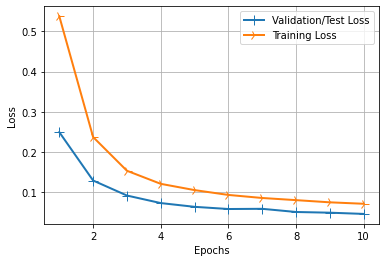

In [10]:
#plot the loss charts
import matplotlib.pyplot as plt

#use the history object to get our saved performance results

history_dict=history.history

#extract the loss and the validation losses
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']


#get the number of epochs and create an array up to that number
#using range()

epochs=range(1,len(loss_values)+1)

#plot line charts for both validation and Training loss
line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs, loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plot of the Accuracy 

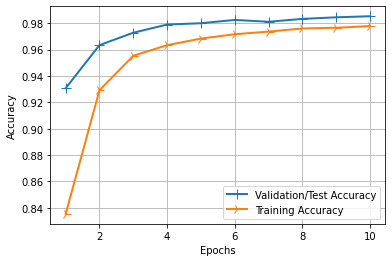

In [11]:
#plot the accuracy chart 
import matplotlib.pyplot as plt

#use the history object to get our saved performance results

history_dict=history.history

#extract the accuracy
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']


#get the number of epochs and create an array up to that number
#using range()

epochs=range(1,len(loss_values)+1)

#plot line charts for both validation and Training loss
line1=plt.plot(epochs,val_acc_values,label='Validation/Test Accuracy')
line2=plt.plot(epochs, acc_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
#saving the model 
model.save('mnist_simple_cnn_10_Epochs.h5')
print('model is saved')

model is saved


In [13]:
from tensorflow.keras.models import load_model
classifier=load_model('mnist_simple_cnn_10_Epochs.h5')

#Testing the model on some random Test Data

2	4	7	4	1	

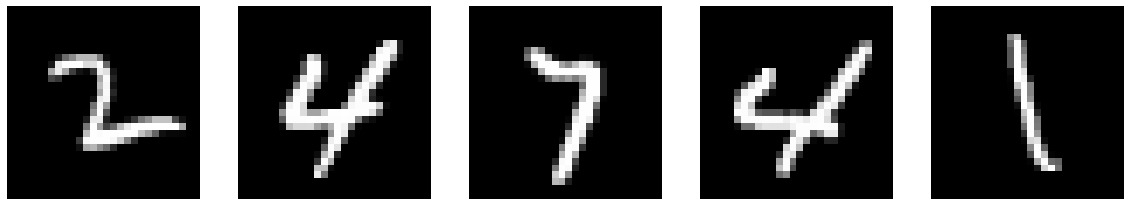

In [14]:
import numpy as np
figure=plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_idx=np.random.randint(0, len(x_test))
  plt.imshow(x_test[random_idx,:,:,0],cmap='gray')
  plt.axis('off')
  print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,28,28,1)), 
                             axis=1),axis=0),end='\t')

#Visualization of the CNN 

Objective: Load the trained CNN and understand what they 'see' or learn, this will help in better understanding how they work. 

The workflow is as follows:


1.   Load dataset from milestone 1
2.   Analyse the model's performance by viewing Confusion matrix and Classification Report. Aim at identifying the weakness of the model. Individual performance of each class the CNN and see cases where it has trouble classifying the data correctly. 
3. Identify all samples wrongly classified by the CNN and display the results. Think why the model got it wrong. 
4. Extract our layer outputs and create our activation model.So that we can visualize the activations of each layer. Give the model some input and see how it deal with it. 
5. Display the output shape of the first activation layer and compare it with the output layer shape that can be seen from the model summary.
6. Show the output of the activation map of 4th Convolution Filter or Feature map of the first Convolution Layer.
7. Display all the activations for the first 3 layers of the model.

Output: Display of the classification report and confusion matrix. A display of sample data that is wrongly classified. We then display the activation layer for various CNN layers. 






In [15]:
#Reload the data.
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


In [16]:
#load the datasets
(x_train, y_train),(x_test,y_test)=mnist.load_data()
model=load_model('mnist_simple_cnn_10_Epochs.h5')

In [17]:
#Number of rows and cols
img_rows=x_train[0].shape[0]
img_rows=x_train[0].shape[1]

In [18]:
#Get the data in the right shape for keras.
x_test=x_test.reshape(x_test.shape[0], img_rows,img_cols,1)

In [19]:
#store the shape of a single image
imput_shape=(img_rows,img_cols,1)

In [20]:
#Change the image type to a float32 data type
x_test=x_test.astype('float32')

In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [23]:
#Normalize the data by changing the ranges from 0-255 -- 0-1
x_test /=255.0 
y_test=to_categorical(y_test)
print(x_test.shape[0],'test samples')

10000 test samples


# Display the Classification Report

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred=model.predict_classes(x_test)
print(classification_report(np.argmax(y_test,axis=1),y_pred) )
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg    

# Getting the Misclassified Data

In [25]:
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist



In [26]:
#load the data
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [27]:
#use numpy to create an array that stores a value of 1 when a misclassification occurs.
result=np.absolute(y_test -y_pred)
result_indices=np.nonzero(result>0)
#display the indices of the misclassification
print('Indices of misclassfied data are: \n\n'+ str(result_indices))

Indices of misclassfied data are: 

(array([ 259,  320,  321,  340,  445,  449,  582,  659,  684,  717,  740,
        844,  846,  882,  938,  947,  965, 1014, 1039, 1112, 1182, 1226,
       1232, 1242, 1247, 1260, 1299, 1319, 1326, 1393, 1414, 1500, 1530,
       1581, 1621, 1681, 1709, 1717, 1754, 1878, 1901, 1955, 2035, 2043,
       2098, 2109, 2118, 2129, 2130, 2135, 2189, 2266, 2280, 2293, 2387,
       2406, 2425, 2454, 2462, 2488, 2607, 2654, 2720, 2760, 2780, 2896,
       2921, 2939, 2953, 2995, 3005, 3030, 3060, 3073, 3422, 3503, 3520,
       3550, 3558, 3559, 3597, 3726, 3749, 3751, 3767, 3808, 3838, 3853,
       3906, 4007, 4065, 4075, 4078, 4163, 4176, 4224, 4238, 4248, 4256,
       4500, 4536, 4571, 4575, 4639, 4690, 4740, 4761, 4807, 4814, 4874,
       4956, 5331, 5634, 5642, 5887, 5888, 5955, 5973, 6011, 6091, 6173,
       6505, 6571, 6572, 6576, 6597, 6625, 6651, 6847, 7432, 7434, 8059,
       8094, 8408, 9009, 9015, 9019, 9024, 9664, 9679, 9692, 9729, 9770,
       9792, 9

# Reload the Dataset

In [28]:
#lets store the number of rows and columns
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

#get the data in the right shape for Keras.
#add a 4th dimension to our data (60 000, 28,28) to (60 000,28,28,1)
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)


#store the shape of a single image
input_shape=(img_rows,img_cols,1)

#change the image type to be a float
x_train=x_train.astype('float32') # unint8
x_test=x_test.astype('float32')

#normalize the data by changing the range from 0-255 to 0-1 

x_train /=255.0
x_test /=255.0

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0],'test samples')



x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples




# Display the Misclassified Data

0	8	7	3	0	

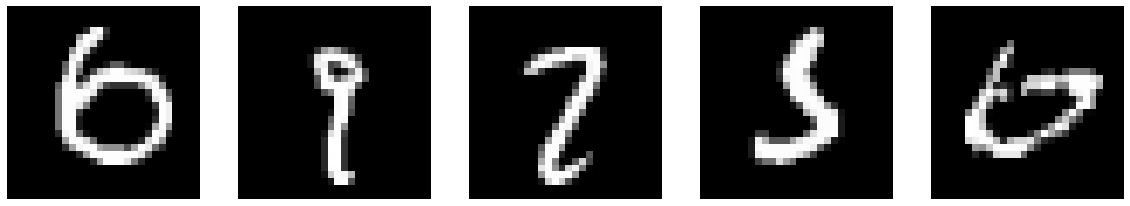

In [29]:
import matplotlib.pyplot as plt

figure=plt.figure(figsize=(20,20))

for i in range(5):
  figure.add_subplot(1,5,i+1)
  index=result_indices[0][i]
  plt.imshow(x_test[index,:,:,0], cmap='gray')
  plt.axis('off')
  prediction=np.squeeze(np.argmax(model.predict(x_test[index].reshape(1,28,28,1)), axis=1),axis=0)
  print(prediction, end='\t')

# Viewing the Activation Maps of the CNN

We extract the layer outputs and create and activation model (i.e. a model that returns the outputs of the layers)

In [30]:
from tensorflow.keras.models import Model
# Extract the outputs of the top 7 layers
layer_outputs=[layer.output for layer in model.layers[:7]]
#create model that will return these outputs, given the model input
activation_model=Model(inputs=model.input,outputs=layer_outputs)

# Display the test Image

(-0.5, 27.5, 27.5, -0.5)

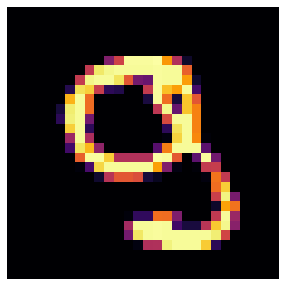

In [31]:
import matplotlib.pyplot as plt
img_tensor=x_test[151].reshape(1,28,28,1)
fig=plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap='inferno')
plt.axis('off')

# Running the model in predict mode to get the activation layers

When an image is fed to the model, it returns the values of the layer activations in the original model.

In [32]:
activations=activation_model.predict(img_tensor)
print('Number of layer activations: '+ str(len(activations)))

Number of layer activations: 7


In [33]:
#activation of the first convolution layer for the image input
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [34]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                9

The output of the first activation layer can be seen to be of the same shape as the output of the first Convolution layer. it a 26 * 26 feature map with 32 Conv channels. We then plot the fourth Conv channel/Filter of the activation of the first layer of the original model.  

# The output of the 4th Conv filter in the first Conv Layer

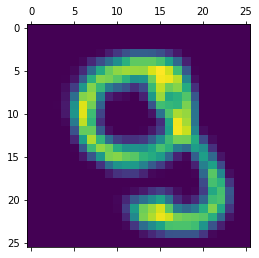

In [35]:
plt.matshow(first_layer_activation[0,:,:,3],cmap='viridis')

# A function that displays the activations of specific layers

In [36]:
def display_activation(activations, col_size, row_size, act_index):
  activation=activations[act_index]
  activation_index=0
  fig,ax=plt.subplots(row_size,col_size, figsize=(row_size *2.5,col_size*1.5))
  for row in range(0, row_size):
    for col in range(0, col_size):
      ax[row][col].imshow(activation[0,:,:,activation_index], cmap='viridis')
      activation_index +=1


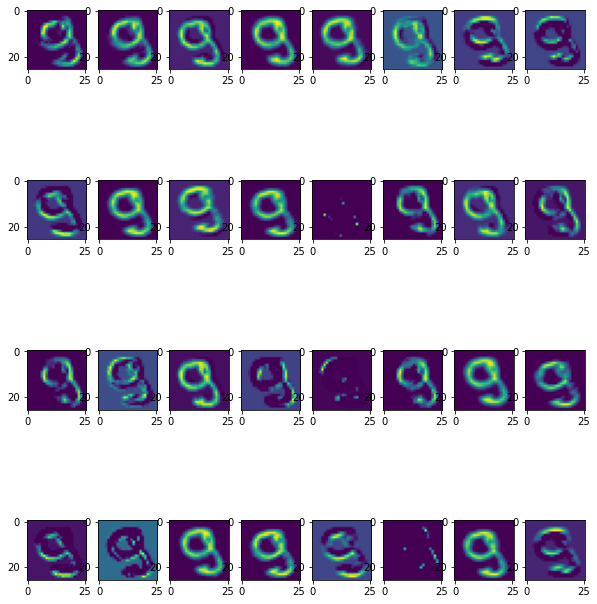

In [37]:
display_activation(activations,8,4,0)

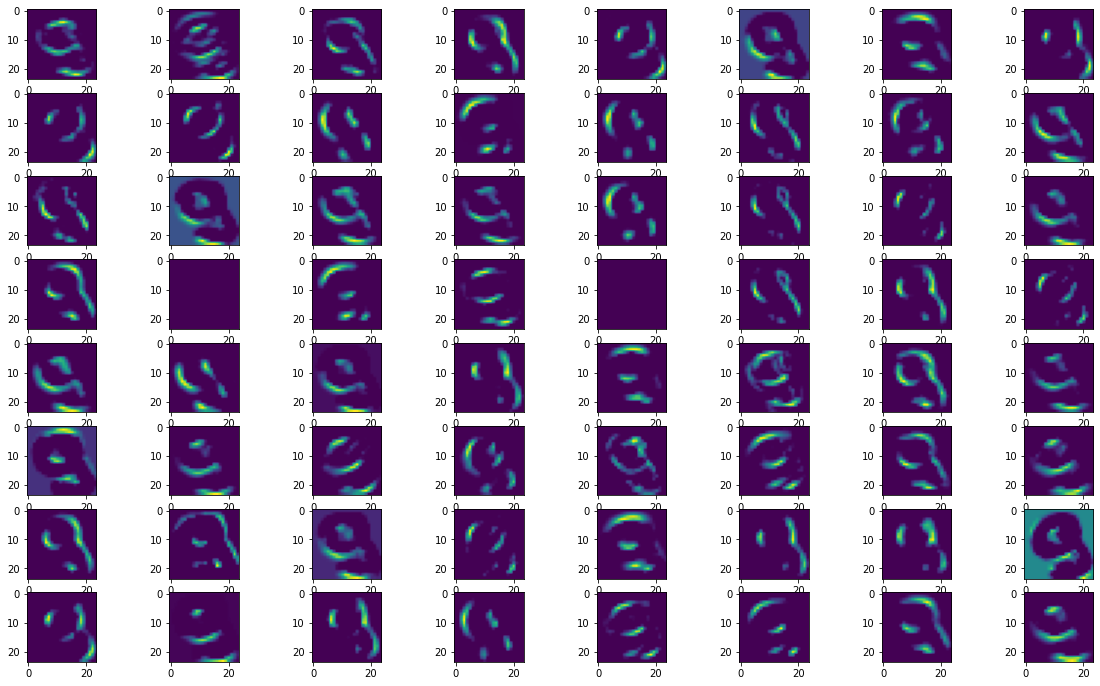

In [38]:
display_activation(activations,8,8,1)

In [39]:
#This is the activation map. 
# prepare a dataset -- 

# Transfer Learning: Understanding Transfer of Learning